In [1]:
pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 18.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading Data**

### Afrobarometer Survey 2016-2018 (Merged 34 countries)

https://www.datafirst.uct.ac.za/dataportal/index.php/catalog/808

In [4]:
# Substitua 'seu_arquivo.sav' pelo caminho do seu arquivo .sav
arquivo_sav = '/content/afr34-2016-2018-v1.sav'

# Carrega os dados do arquivo .sav
dados, metadados = pyreadstat.read_sav(arquivo_sav, apply_value_formats=True)

# Converte os dados para um DataFrame do Pandas
df = pd.DataFrame(dados)

# Configurar o Pandas para exibir todas as colunas
pd.set_option('display.max_columns', None)

In [5]:
# Exibe as primeiras linhas do DataFrame
df.head()

,RESPNO,COUNTRY,COUNTRY_Old.order,COUNTRY_R5List,COUNTRY_R6List,COUNTRY.BY.REGION,URBRUR,REGION,LOCATION.LEVEL.1,EA_SVC_A,EA_SVC_B,EA_SVC_C,EA_SVC_D,EA_FAC_A,EA_FAC_B,EA_FAC_C,EA_FAC_D,EA_FAC_E,EA_FAC_F,EA_FAC_G,EA_SEC_A,EA_SEC_B,EA_SEC_C,EA_SEC_D,EA_SEC_E,EA_ROAD_A,EA_ROAD_B,EA_ROAD_C,NOCALL_1,NOCALL_1OTHER,NOCALL_2,NOCALL_2OTHER,NOCALL_3,NOCALL_3OTHER,NOCALL_4,NOCALL_4OTHER,NOCALL_5,NOCALL_6,NOCALL_7,NOCALL_7OTHER,NOCALL_8,THISINT,ADULT_CT,CALLS,DATEINTR,STRTIME,Q1,Q2A,Q2AOTHER,Q2B,Q2BOTHER,Q3,Q4A,Q4B,Q5,Q6,Q7,Q8A,Q8B,Q8C,Q8D,Q8E,Q8F,Q9,Q10A,Q10B,Q11A,Q11B,Q12A,Q12B,Q12C,Q12D,Q12E,Q13,Q14,Q15,Q16,Q17,Q18A,Q18B,Q18C,Q18D,Q19A,Q19B,Q19C,Q19D,Q19E,Q20A,Q20B,Q21A,Q21B,Q22,Q23,Q24A,Q24B,Q25A,Q25B,Q25C,Q25D,Q25E,Q25F,Q26A,Q26B,Q26C,Q26D,Q26E,Q27A,Q27B,Q27C,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38A,Q38B,Q38C,Q38D,Q38E,Q38F,Q38G,Q39A,Q39B,Q39C,Q40,Q41,Q42A,Q42B,Q42C,Q42D,Q42E,Q42F,Q43A,Q43B,Q43C,Q43D,Q43E,Q43F,Q43G,Q43H,Q43I,Q43J,Q43K,Q44A,Q44B,Q44C,Q44D,Q44E,Q44F,Q44G,Q44H,Q44I,Q44J,Q45,Q46,Q47,Q48A,Q48B,Q48C,Q48D,Q48E,Q48F,Q49A,Q49B,Q49C,Q49D,Q49E,Q49F,Q49G,Q49H,Q49I,Q49J,Q49K,Q49L,Q49M,Q49N,Q49O,Q49P,Q49Q,Q49R,Q49S,Q49T,Q50,Q51,Q52,Q53A,Q53B,Q53C,Q54A,Q54B,Q55PT1,Q55PT1OTHER,Q55PT2,Q55PT2OTHER,Q55PT3,Q55PT3OTHER,Q56A,Q56B,Q56C,Q56D,Q56E,Q56F,Q56G,Q56H,Q56I,Q56J,Q56K,Q56L,Q56M,Q56N,Q56O,Q56P,Q56Q,Q56R,Q56S,Q57A,Q57B,Q57C,Q57D,Q57E,Q57F,Q57G,Q58A,Q58B,Q58C,Q58D,Q58E,Q59A,Q59B,Q59C,Q60A,Q60B,Q60C,Q60D,Q61A,Q61B,Q61C,Q62,Q63,Q64,Q65,Q66,Q67,Q68A,Q68B,Q69,Q70,Q70OTHER,Q71,Q72A,Q72B,Q73A,Q73B,Q74,Q75,Q76,Q77A,Q77B,Q77C,Q77D,Q78A,Q78B,Q84,Q84OTHER,Q85A,Q85B,Q86A,Q86B,Q86C,Q86D,Q87A,Q87B,Q87C,Q87D,Q88A,Q88B,Q88BOTHER,Q89A,Q89B,Q89C,Q89D,Q89E,Q89F,Q90,Q91A,Q91B,Q92A,Q92B,Q93,Q94,Q95A,Q95B,Q95C,Q96A,Q96B,Q97,Q98,Q98OTHER,Q99,Q99OTHER,Q100,ENDTIME,LENGTH,Q101,Q102,Q102OTHER,Q103,Q103OTHER,Q104,Q105,Q106,Q107A,Q107B,Q107C,Q107D,Q107E,Q108,Q110A,Q110B,Q110C,Q110D,Q110E,Q110F,Q112,Q113,Q114,Q115,Q116,Q116OTHER,Q117,Q117OTHER,Q118,Q119_1,Q119_2,Q119_3,Q119_4,Q119_5,Q119_6,Q119_7,Q119_8,Q119_9,Q119_10,Q119_11,Q119OTHER,withinwt,Combinwt,URBRUR_COND,AGE_COND,EDUC_COND,RELIG_COND,LivedPoverty,LivedPoverty_CAT,DemandDemo,SupplyDemo,R1.only,R2.only,R3.only,R4.only,R5.only,R6.only
0,BEN0001,Benin,Benin,Benin,Benin,West Africa,Rural,Mono,LOKOSSA,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,No,No,No,Earth,Earth,Poor,Interview was successful,,Interview was successful,,Interview was successful,,Interview was successful,,Interview was successful,Interview was successful,Interview was successful,,Interview was successful,Female,2.0,1.0,2016-12-25,12:53:17,21.0,Adjagbé,,Adjagbé,,Going in the right direction,Fairly Bad,Fairly Good,Worse,Much worse,Much worse,Several times,Many times,Several times,Never,Many times,Several times a week,Somewhat,Several times,Never,No,No,Less than once a month,Never,Never,Never,Never,Occasionally,Somewhat free,Agree with 2,Agree very strongly with 2,Agree very strongly with 2,Not very likely,Somewhat likely,Not very likely,Very likely,Somewhat less freedom,Somewhat less freedom,Somewhat less freedom,Somewhat less freedom,Somewhat less freedom,Not a Member,Active Member,"Yes, several times","Yes, several times",You voted in the elections,Completely free and fair,Yes,Yes,Never,Never,Never,Only once,Never,A few times,"No, but would do if had the chance","No, but would do if had the chance","No, but would do if had the chance","Yes, several times","No, but would do if had the chance",Strongly Disapprove,Strongly Approve,Strongly Disapprove,STATEMENT 3: Doesn't matter,Agree with 2,Agree very strongly with 1,Agree very strongly with 2,Agree very strongly with 1,Agree very strongly with 2,Agree with 1,A full democracy,Not very satisfied,Agree very strongly with 1,Disagree,Disagree,Agree,Strongly Disagree,Disagree,Disagree,Agree,Always,Never,Never,A little bit,Never,Often,Never,Always,Often,Never,Often,A lot,Somewhat,Somewhat,A lot,A lot,Somewhat,A lot,A lot,A lot,A lot,A lot,Some of them,Most of them,Most of them,Some of them,Som

In [ ]:
print(df.shape)

(45823, 365)


# **Countries**

In [ ]:

# Calcular o número de países únicos no DataFrame sem duplicatas
numero_de_paises = df['COUNTRY'].nunique()

print(f'O número de países no DataFrame é: {numero_de_paises}')


O número de países no DataFrame é: 34


In [ ]:
df.groupby('THISINT')['Combinwt'].sum()/df['Combinwt'].sum()

THISINT
Female     0.500475
Male       0.499341
Missing    0.000184
Name: Combinwt, dtype: float64

O Afrobarometer entrevistou 1.200 pessoas em cada país. O total da população é 1200. Porém, o peso de cada pessoa nas estatísticas será diferente. Isso só se refletirá ao analisar o percentual da população em cada variável.

Para comparação, este relatório contém todas as estatísticas para *Gambia*: https://www.afrobarometer.org/wp-content/uploads/2022/02/gam_r7_sor.pdf

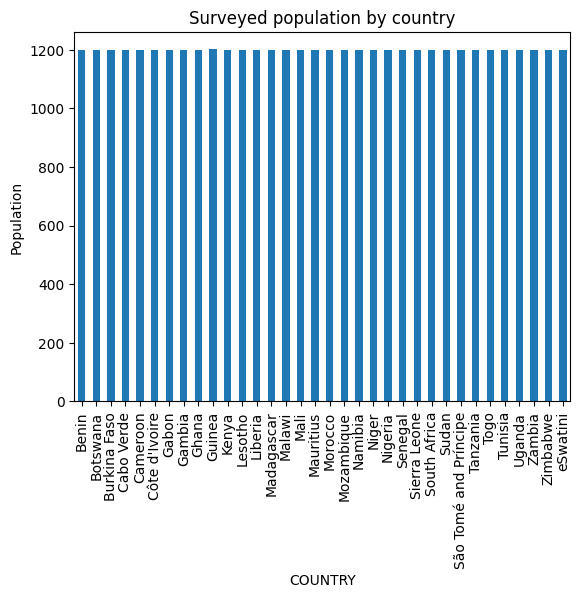

In [ ]:
# Population Totals
# Combinwt - cross-country sample weight
# Withinwt - within-country sample weight
populacao_total_por_pais = df.groupby('COUNTRY')['Combinwt'].sum()

# Exibir o resultado
populacao_total_por_pais.plot(kind='bar', legend=False)
plt.title('Surveyed population by country')
plt.ylabel('Population')
plt.show()

## Rural/Urban

In [ ]:
df['URBRUR_COND'].value_counts(normalize=True)

Rural    0.552299
Urban    0.447701
Name: URBRUR_COND, dtype: float64

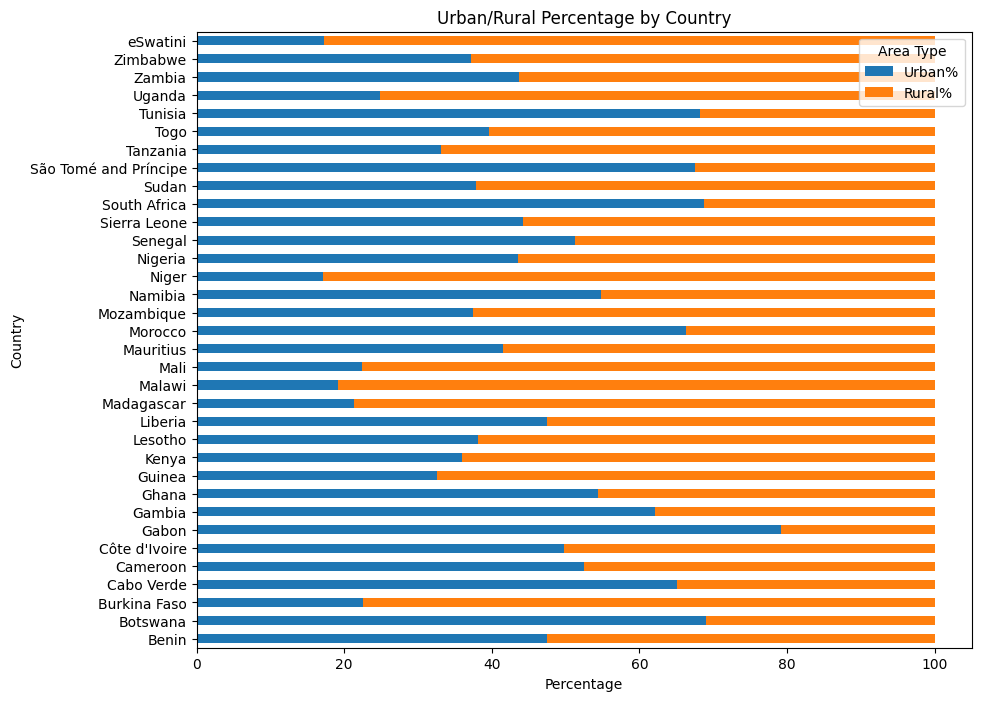

In [ ]:
# Group by country and URBRUR_COND, and sum the weights
grouped = df.groupby(['COUNTRY', 'URBRUR_COND'])['Combinwt'].sum().reset_index()

# Pivot the data to have countries as rows and urban/rural as columns
pivot_table = grouped.pivot(index='COUNTRY', columns='URBRUR_COND', values='Combinwt')

# Calculate the percentage
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table['Rural%'] = pivot_table['Rural'] / pivot_table['Total'] * 100
pivot_table['Urban%'] = pivot_table['Urban'] / pivot_table['Total'] * 100

# Prepare the final DataFrame for plotting
plot_data = pivot_table[['Urban%', 'Rural%']]
# Plotting
ax = plot_data.plot(kind='barh', stacked=True, figsize=(10, 8))

plt.xlabel('Percentage')
plt.ylabel('Country')
plt.title('Urban/Rural Percentage by Country')
plt.legend(title='Area Type')

plt.show()


In [ ]:
pivot_table

URBRUR_COND,Rural,Urban,Total,Rural%,Urban%
COUNTRY,,,,,
Benin,629.470451,570.529549,1200.000000,52.455871,47.544129
Botswana,372.244303,827.755698,1200.000001,31.020359,68.979641
Burkina Faso,929.842589,270.157377,1199.999965,77.486885,22.513115
Cabo Verde,418.351896,781.648104,1200.000000,34.862658,65.137342
Cameroon,570.659352,629.340649,1200.000001,47.554946,52.445054
Côte d'Ivoire,603.053183,596.946817,1200.000000,50.254432,49.745568
Gabon,249.995097,950.004903,1200.000000,20.832925,79.167075
Gambia,454.210694,745.789365,1200.000058,37.850889,62.149111
Ghana,547.380866,652.619139,1200.000006,45.615072,54.384928


# **Ethnicity Variables**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45823 entries, 0 to 45822
Columns: 365 entries, RESPNO to R6.only
dtypes: category(334), float64(6), object(25)
memory usage: 28.8+ MB


In [ ]:
# Localizar valores nulos em todo o DataFrame
valores_nulos = df.isna().sum()

# Exibir o DataFrame resultante
print(valores_nulos)

RESPNO               0
COUNTRY              0
COUNTRY_Old.order    0
COUNTRY_R5List       0
COUNTRY_R6List       0
                    ..
R2.only              0
R3.only              0
R4.only              0
R5.only              0
R6.only              0
Length: 365, dtype: int64


In [ ]:
# Verificar a distribuição percentual por país para cada variável
distribuicao_q84 = df.groupby('COUNTRY')['Q84'].value_counts(normalize=True).unstack() * 100
distribuicao_q84other = df.groupby('COUNTRY')['Q84OTHER'].value_counts(normalize=True).unstack() * 100
distribuicao_q85a = df.groupby('COUNTRY')['Q85A'].value_counts(normalize=True).unstack() * 100
distribuicao_q85b = df.groupby('COUNTRY')['Q85B'].value_counts(normalize=True).unstack() * 100

### **Exibir os resultados**

In [ ]:
print(metadados.column_names_to_labels['Q84'])
distribuicao_q84.head()

Q84. Ethnic community, cultural group or tribe


Q84,Acholi,Adja,African,Africans,Afrikaaner,Afrikaans / Afrikaner / Boer,Afro-Mauritian (Creole),Ajaua,Akan,Akébou,Alur,American or European,American ou European,Antakarana,Antandroy,Antanosy,Antefasy,Antembahoaka,Antemoro,Antesaka,Arabe,Arabe choua,Arabic,Aten,Ateso,Bafia,Bafut,Bainouk,Bakanigui,Bakundu,Bakweri,Balikumbat,Baloumbou,Bambara,Bamiléké,Bamoun,Banen,Bangwa,Bara,Bariba,Bassa,Baster,Batanga,Bateke,Batibo,Bavungu,Bayangi,Bella,Belle,Bemba,Ben (Moba),Beti,Betsileo,Betsimisaraka,Bezanozano,Birifor,Birom,Bisa,Bissa,Bitonga,Bobo,Bozo,Builsa,Buja,Bulu,Bwaba,Caprivian,Chalh,Changana,Chewa,Chichewa,Chinese,Chokwe,Chope,Chuabo,Cinyungue,Coloured,Creole,Creole or Aku Marabout,DAFIN,Daba,Dagaaba,Dagaare,Dagaati,Dagari,Dagomba,Damara,Dei,Dendi,Dii,Diola,Dioula,Djimi,Doesn’t think of self in those terms,Dogon,Don't know,Ebira,Edo,Efik,English,Eshira,Euro-Mauritian (white),Ewe/Anlo,Ewé,Fali,Fang,Fon,Frafra,"Fula, Tukulor or Lorobo",Fulani,Fulfulde,Fulfuldé,Fulla,Ga/Adangbe,Gbandi,Gbaya,German,Gio,Goba,Goin,Gola,Gonja,Gourma,Gourmantché,Gourmatche,Gourounsi,Grebo,Guider,Guiziga,Gur (Voltaïque),Guérzé,Gwari,Haoussa,Hausa,Herero,Higgi,Hina,Hindu,Ibibio,Idoma,Ifè (Ana),Igala,Igbo,Ijaw,Ikposso (Akposso),Ikwere,Ila,Indian,Isoko,Itsekiri,Jahanka,Japhadhola,Jola,Jukun,Kabyè,Kakolo,Kakwa,Kalabari,Kalanga,Kalenjin,Kamba,Kanouri,Kanuri,Kaonde,Kapsiki,Karamajong,Karanga,Karoninka,Kassena,"Kavango (Rukwangali, Rumanyo, Hambukushu)",Khassonké,Kikuyu,Kisii,Kissi,Kissien,Konkomba,Kono,Korekore,Kota,Kotoko,Kotokoli,Kpelle,Krahn,Krobo,Krou,Kru,Kunda,Kurama,Kuranko,Kusaal,Kusasi,Kélé,Lala,Lama (Lamba),Lamba,Lambya,Langi,Lebou,Lekhoakhoa,Lekholokoe,Lenje,Lephuthing,Letebele,Limba,Lobi,Loko,Lomue,Lomwe,Lopka,Lorma,Lozi,Lugbara,Luhya,Lunda,Lungu,Luo,Luvale,Madi,Madingo,Mafa,Mahafafly,Maka,Makonde,Makua,Malinké,Mambwe,Mamprusi,Mandara,Mandingo,Mandinka,Mandinka/Bambara,Mandé du Nord,Mandé du Sud,Mang’anja,Manhaua,Manhungue,Manjack,Manjago,Mankon,Mano,Manyika,Marathi,Marka,Masai/Samburu,Masangu,Masikoro,Massa,Maure,Mbamois,Mbena,Mbo,Mboum,Mbunda,Mbédè,Mchaga,Mdigo,Mende,Merina,Meru/Embu,Mfipa,Mgogo,Mhaya,Mhehe,MijiKenda,Mina (Guen),Minianka,Missing,Mjaluo,Mjita,Mkaguru,Mkerewe,Mkinga,Mkurya,Mkwere,Mluguru,Mmakonde,Mmakuwa,Mmanyema,Mmasai,Mmatengo,Mmatumbi,Mmeru,Mmirwa,Mmwera,Mndali,Mndendeule,Mndengereko,Mngindo,Mngoni,Mnyakyusa,Mnyambo,Mnyamwanga,Mnyamwezi,Mnyaturu,Mnyiha,Mnyiramba,Mofokeng,Moherero,Mohlakoana / Motebang,Mohurutshe,Mokalaka/Mokalanga,Mokgalagadi,Mokgatla,Mokhatla,Mokhurutshe,Mokoena,Mokubung,Mokwena,Molete,Mombukushu,Mongologa,Mongwaketse,Mongwato,Mophuthi,Morolong,Mosarwa,Mosiea,Mossi,Mosubeya,Motalaote,Motaung,Motawana,Mothepu,Motlharo,Motlokoa,Motlokwa,Motloung,Motsoeneng,Motswapong,Moudan,Mountain,Mousgoum,Moyeyi/Moyei,Mpare,Mpogoro,Mrangi,Msambaa,Mshirazi,Msukuma,Mtumbatu,Mufumbira,Muganda,Mugishu,Mugwere,Muha,Muiraki,Mukhonjo,Mukiga,Munyankole,Munyole,Munyoro,Musamia,Muslim,Musoga,Mutooro,Myao,Myénè,Mzaramo,Mziguo,Nama,Namwanga,Nawdem (Losso),Ndau,Ndebele,Ngam-Gam,Ngoni,Ngumbo,Njikwa,Nkhonde,Nkoya,Not asked in the country,Nsenga,Nso,Nupe,Nyanja,Nyika,Nzebi,Nzébi/Métié,N’Tcha (Bassar),Obamba,Ogoni,Otamari,Other,Ouatchi,Pedi/North Sotho,Peuhl,Peule,Peulh,Peulh / Fulfude,Pokot,Portuguese,Pulaar/Toucouleur,Punu/Mériè,Refused,Related to Gender,Related to Race,Related to Religion,Related to age,Related to gender,Related to political party affiliation,Related to political-partisan affiliation,Related to race,Related to regional origin (badio/sampadjudo),Related to religian,Related to social classes,"Related to social groups (Foros, Angulares, Cabo-verdianos, Principenses)",Related to the job,Rifi,Ronga,Sabini,Sahraoui,Sakalava,Samo,Samogo,Sawa,Sena,Senga,Senufo,Serahuleh,Serer,Shangaan,Shangaan / Tsonga,Sherbro,Shona,Shuwa-Arab,Sihanaka,Soli,Somali,Soninke,Soninké / Sarakollé,Sonraï,Sonrhaï,Sossou,Sotho/South Sotho,Soussi,Subia,Susu,Swazi,Sénoufo,TOUSSIAN,Tabwa,Taita,Tamasheq,Tamil,Tanala,Tchamba,Tchokossi (Anoufom),Telegu,Tem (Kotokoli

In [ ]:
print(metadados.column_names_to_labels['Q84OTHER'])
print("\nDistribuição percentual de Q84OTHER por país:")
distribuicao_q84other.head()

Q84other. Ethnic community, cultural group or tribe (verbatim)

Distribuição percentual de Q84OTHER por país:


Q84OTHER,,ABAKOUM,ABERDEEN FOURBAY,ABI,ABO,ABOH,ABOU,ADELE,ADOUMA,AFEMAI,AFO,AFRICAN,AFRIKAANS,AFRIKAANS BUT MARRIED TO A XHOSA,AGHEM,AGNANGA,AGOUNA,AHOUSSA,AHUDAR,AIZO,AIZOR,AKELE,AKHOKHOLA,AKKU,AKÉLÉ,AL ABRY,ALIFOKPA,ALIN,ALIZAKWAANI,AMANHAUA,AMBANIANDRO,AMERICA LATINA,ANAGO,ANANG,ANANJO,ANGONI,ANINHÕ,ANJAGO,ANJOATY,ANNAN,ANNANG,ANUFO,ANYAGLAN,APINDI,APINDJI,APINDZI,ARABE,ARABE CHOA,ARABIC,ASIAN,ATEN,ATTEN,AWANDJI,AÏZO,AÏZOGBÉ,BAASARE,BABA,BABADJOU,BABANKI,BABOUTE,BABUKUSU,BABUR,BACHAMA,BACOCO,BADADA,BADALCHI,BADEM,BAFAN,BAFANG,BAFANJI,BAFMAN,BAFMEN,BAFOR,BAFOU,BAFOUSSAM,BAGA,BAGANGTE,BAGANTE,BAGOBIRA,BAHAM,BAHASAN,BAHOUMBOU,BAINAWA,BAINUKA,BAINUNKA,BAJJU,BAKAGNINGUI,BAKAKA,BAKANIGUI,BAKANINGUI,BAKINYI,BAKOKO,BAKOSSI,BAKOUELE,BAKUSI,BAKWELE,BAKWERE,BAKWÉLÉ,BALANTA,BALANTE,BALANTO,BALI,BALINYONGHA,BALOUMBOU,BALOZVI,BALUMBU,BAMBARA,BAMEDA,BAMEGOUM,BAMEKA,BAMELEKE,BAMILEKE,BAMOUN,BAMUNKUMBIT,BANA,BANDA,BANDJOUN,BANEN,BANGEM,BANSO,BANSOA,BANWA,BANWOIN,BAROTSHI,BARROBO,BARROBO GREBO,BARUBA,BASARE,BASARI,BASSA,BASSA NGE,BASSARI,BASSOSSI,BATA,BATCHINGOU,BATEKE,BATIE,BATSANGUI,BATSI,BAVILI,BAWADJI,BAWANDJI,BAWOUMBOU,BAYA,BAYAMGAM,BAYANGAM,BAYAYUWI,BAYEI,BAYENAWA,BAYNAWA,BAYUMBU,BAZABARMA,BAZABARMI,BEBA,BELLA,BELLARAI,BEMBA BESA,BEMBA FULA,BEMBA LUNDA,BEMBA MUMBA,BEMBA NGUBO,BEMBA SHILA,BEMBA TABWA,BEMOBA,BENDEL,BENE,BENE (BETI),BENGA,BERBA,BERIBERI,BETANIMENA,BETI,BETSIREBAKA,BIMBILA,BIMOBA,BINI,BINMUBA,BINUNKE,BIPCO,BIRWA,BISARAKA,BISSA,BITONGA,BIZA,BLOSA,BO,BO'O,BOBILIS,BOBLISE,BOCHA,BOGHOM,BOKO,BOKO PUSIGA,BOKOM,BONAKANDA,BORAN,BORANA,BORNOU,BOSANGA,BOURI,BRASALI,BREFO,BRIFO,BRIFOR,BROSSA,BUBURMI,BUH,BUILISA,BUILSA,BUKUSU,BULU,BUM,BUNYORE,BURMANCHI,BURU,BURUMAI,BUSANGA,BUSHMAN,CAPE MALAY,CAPE MALAY MUSLIM,CATHOLIC,CHAKOSI,CHAM,CHAMBA,CHANGANA,CHANGANI,CHAWA,CHECHEWA,CHEWA,CHIBARWE,CHICHEWA,CHIKHOKHOLA,CHIKUNDA,CHIMANHICA,CHINHUNGUE,CHINYUGUE,CHINYUNGUE,CHITOKO,CHIUTE,CHIUTEWE,CHOKOSI,CHOKWE,CHOPE,CHRISTIAN,CHRISTIANITY,CINYUNGUE,CITSWA,COLORED MALAY MUSLIM,COLOURED,COMONON,CREOLE,DAAGARE,DABA,DAFIN,DAFING,DAGAABA,DAGAABA/WAALE,DAGAARE,DAGAAREE,DAGAARI,DAGAATE,DAGAATI,DAGARE,DAGAREE,DAGARTI,DAGATI,DAGAW,DAGBANI,DAGÀABA,DAKARCHI,DAKKARCI,DAKOTRAKE,DAN,DANGATI,DARKACHI,DEERA,DEFI,DENDI,DHLAMINI,DIAKANKE,DIAKANKÉ,DIAWANDO,DII,DJAHI,DJAKANKE,DJAN,"DJELI, GRIOT",DJIMI,DJIMIRE,DLAMINI,DNIMIRE,DOGOCE,DOGON/NATURALISÉ,DOGONA,DOGOSSE,DOKONO,DOMBE,DOUALA,DOUMOU,DOUROU,DSCHANG,DUWADE,DWAN,ECHIRA,ECHOJI,EDONGO,EKO,EKOTI,EMBEMBE,ESAN,ESHIRA,ESMAELIA,ETON,ETONG,ETONNE,ETSAKO,ETSAKOR,EVIHA,EWONDO,FANFARCE,FANTI,FINANGA,FODO,FORGERON,FOUBANAIS,FOULBE,FOULGUA,FOURBAY,FRAFRA,FRAFRAH,FRANÇAIS,FREERER,FULA,FULANI,FULFULDE,FULGA,FULSE,FUTANKE,GA'DE,GADE,GANA,GANAGANA,GANDO,GANGAMBA,GANGANBA,GAVAR,GBAGRI,GBAGYI,GBAYA,GBI,GBI & DORU,GEDE,GERE,GERMA,GIRIAMA,GISIRE,GNAGO,GOGOBIRI,GONJA,GOURMANTCHÉ,GOURO,GOUSDAN,GOVA,GRUMA,GRUSI,GUAN,GUERE,GUISIR,GUISIR ET VOUGOU,GUISSIR,GUIZIGA,GUN,GUNGBE,GURMA,GURUCCHI,GURUNE,GURUNE OR FRAFRA,GURUSI,GUSSIR,GUZANG,GWA,GWANDARA,HAOSSA,HAOUSSA,HAUSA,HAUZA,HIGGI,HILAGA,HINA,HINARE,HINDU,HLAMENE,HLUBI,HOUDOU,HUASA,IBO,IDAATCHA,IDATCHA,IGARRA,IGBANI,IKPESHI,ISUKHA,IYACHIE,JABA,JAHADIRI,JAHANKO,JALUNKO,JANI,JINDWE,JONJU,JUKUN,JUNJU,JUST AFRICAN,KABALAKA,KABARAS,KABOLI,KABRI,KAKO,KAKOLO,KAKWA,KALAGBARI,KALUNDA,KAMUKHU,KAMUKU,KANOURI,KAONDE ILA,KARFAWA,KARONINKA,KASEM,KASINKA,KASSAYENNE,KASSENA,KAUMA,KEMBONG,KENOURIR (KOLFATA),KHISUHA,KHOI SAN,KHOKHOLA,KIHA,KIJARUO,KIKAGULU,KILA,KIMARAGOLI,KIMWANI,KINYAMBO,KIRFAWA,KISUAHILI,KODO,KOKOMBA,KOLE,KOM,KOMKOMBA,KOMOUNOU,KONIAKA,KONIANKE,KONKOMBA,KONKONBA,KONÖ,KOSSALE,KOSSASSE,KOTA,KOTAKOTA,KOTOKLI,KOTOKO,KOTOKOKI,KOTOKOLI,KOTOKOLIE,KOUNTENI,KOURANKO,KOURTE,KOYAKA,KPESSIGBE,KRACHIE,KRATSI,KROBO,KROO,KUELE,KUMAM,KUMBA,KUMBO (NORD-OUEST ),KURAMA,KURIA,KUSAAL,KUSAASI,KUSAL,KUSASI,KUSSASI,KWALE,KWELE,LAGUNAIRE,LAIBEH,LAKA,LALA,LAMBIA,LAME,LAMUN,LANDOUMA,LEBOKO,LEBOU,LECHAMKANE,LEHLOBI,LEIKHA,LEMPENKHE,LENDOUMA,LENYOSE,LEPELE,LEPELI,LEQHOATHO,LIBAHARI,LIBAHASANI,LIBIALEM,LIKPAKPAA,LIMBA-SOSO,

In [ ]:
print(metadados.column_names_to_labels['Q85A'])
print("\nDistribuição percentual de Q85A por país:")
distribuicao_q85a.head()

Q85a. Ethnic group treated unfairly

Distribuição percentual de Q85A por país:


Q85A,Always,Don’t know,Missing,Never,Not applicable,Not asked in the country,Often,Refused,Sometimes
COUNTRY,,,,,,,,,
Benin,7.500000,1.250000,13.083333,46.750000,0.083333,0.0,9.833333,0.083333,21.416667
Botswana,2.754591,3.338898,0.000000,70.868114,9.265442,0.0,2.671119,0.166945,10.934891
Burkina Faso,1.416667,1.500000,1.500000,81.166667,0.083333,0.0,5.166667,0.083333,9.083333
Cabo Verde,2.666667,0.583333,0.000000,42.083333,38.083333,0.0,1.666667,0.000000,14.916667
Cameroon,9.983361,10.399334,0.000000,38.935108,1.913478,0.0,10.815308,0.000000,27.953411


In [ ]:
print(metadados.column_names_to_labels['Q85B'])
print("\nDistribuição percentual de Q85B por país:")
distribuicao_q85b.head()

Q85b. Ethnic or national identity

Distribuição percentual de Q85B por país:


Q85B,Don't know,I feel equally (national identity) and (ethnic group),I feel more (ethnic group) than (national identity),I feel more (national identity) than (ethnic group),I feel only (ethnic group),I feel only (national identity),Missing,Not applicable,Not asked in the country,Refused
COUNTRY,,,,,,,,,,
Benin,0.416667,40.250000,13.500000,6.916667,6.916667,18.833333,13.083333,0.083333,0.0,0.000000
Botswana,0.500835,52.504174,5.342237,4.090150,5.926544,22.203673,0.000000,9.265442,0.0,0.166945
Burkina Faso,0.333333,37.916667,6.583333,9.583333,6.250000,37.666667,1.500000,0.083333,0.0,0.083333
Cabo Verde,0.000000,14.083333,1.750000,8.416667,1.666667,36.000000,0.000000,38.083333,0.0,0.000000
Cameroon,1.663894,38.519135,9.816972,9.068220,4.908486,34.026622,0.000000,1.913478,0.0,0.083195


# **RESPOSTAS DO Q8E**

In [13]:
# Filtrar apenas as respostas "several times" ou "many times" para a pergunta Q8E
respostas_interessantes = dados[dados['Q8E'].isin(['Several times', 'Many times'])]

# Agrupar por país e grupo étnico, contando o número de respostas
agrupado = respostas_interessantes.groupby(['COUNTRY', 'Q84'])['Combinwt'].sum().reset_index(name='Contagem')

# Para cada país, encontrar o grupo étnico com o maior percentual
resultados = []
for pais in agrupado['COUNTRY'].unique():
    dados_pais = agrupado[agrupado['COUNTRY'] == pais].copy()
    dados_pais['Percentual'] = dados_pais['Contagem'] / dados_pais['Contagem'].sum() * 100
    max_percentual_grupo = dados_pais.loc[dados_pais['Percentual'].idxmax()]
    resultados.append(max_percentual_grupo)

# Criar um DataFrame com os resultados
resultados_df = pd.DataFrame(resultados)

# Exibir os resultados em ordem decrescente de percentagem
resultados_df = resultados_df.sort_values(by='Percentual', ascending=False)

print(metadados.column_names_to_labels['Q8E'])
# Exibir os resultados ou salvar em um arquivo
resultados_df

Q8e. How often gone without cash income


,COUNTRY,Q84,Contagem,Percentual
12495,Sudan,Not asked in the country,426.851338,100.000000
14435,Tunisia,Not asked in the country,305.503064,100.000000
16098,eSwatini,Doesn’t think of self in those terms,435.591512,99.395462
8267,Morocco,Arabic,220.636375,60.305453
9832,Niger,Haoussa,480.386814,58.821356
12703,São Tomé and Príncipe,Doesn’t think of self in those terms,302.082266,57.663986
7766,Mauritius,Afro-Mauritian (Creole),58.796298,55.125481
1287,Burkina Faso,Mossi,361.028162,51.490111
9685,Namibia,Wambo,248.348231,48.282281
1548,Cabo Verde,Doesn’t think of self in those terms,161.152677,45.003056


# **RESPOSTAS DO Q86C**

In [14]:
# Filtrar apenas as respostas "several times" ou "many times" para a pergunta Q8E
respostas_interessantes = dados[dados['Q86C'].isin(['Several times', 'Many times'])]

# Agrupar por país e grupo étnico, contando o número de respostas
agrupado = respostas_interessantes.groupby(['COUNTRY', 'Q84'])['Combinwt'].sum().reset_index(name='Contagem')

# Para cada país, encontrar o grupo étnico com o maior percentual
resultados = []
for pais in agrupado['COUNTRY'].unique():
    dados_pais = agrupado[agrupado['COUNTRY'] == pais].copy()
    dados_pais['Percentual'] = dados_pais['Contagem'] / dados_pais['Contagem'].sum() * 100
    max_percentual_grupo = dados_pais.loc[dados_pais['Percentual'].idxmax()]
    resultados.append(max_percentual_grupo)

# Criar um DataFrame com os resultados
resultados_df = pd.DataFrame(resultados)

# Exibir os resultados em ordem decrescente de percentagem
resultados_df = resultados_df.sort_values(by='Percentual', ascending=False)

print(metadados.column_names_to_labels['Q86C'])
# Exibir os resultados
resultados_df

Q86c. Experienced discrimination based on ethnicity


,COUNTRY,Q84,Contagem,Percentual
14435,Tunisia,Not asked in the country,44.349593,100.000000
12495,Sudan,Not asked in the country,143.479787,100.000000
16098,eSwatini,Doesn’t think of self in those terms,37.880595,95.296507
1457,Cabo Verde,African,19.093410,75.098850
4752,Guinea,Peulh,80.065180,63.106000
12703,São Tomé and Príncipe,Doesn’t think of self in those terms,11.534796,61.307543
11411,Sierra Leone,Mende,42.167459,58.148931
7766,Mauritius,Afro-Mauritian (Creole),32.652354,52.383425
15883,Zimbabwe,Ndebele,37.388802,49.554492
10182,Niger,Zarma/Songhay,33.699946,48.746882
